In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insure = pd.read_csv('insurance.csv')

In [3]:
insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insure.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [5]:
insure.max()

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object

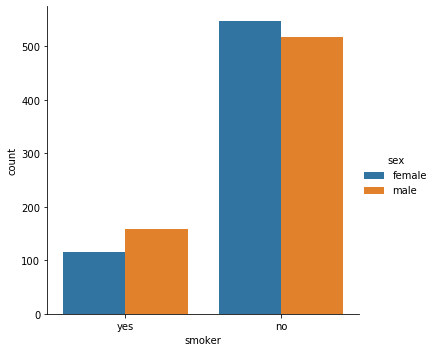

In [6]:
sns.catplot(x = 'smoker', kind='count',hue='sex',data=insure)

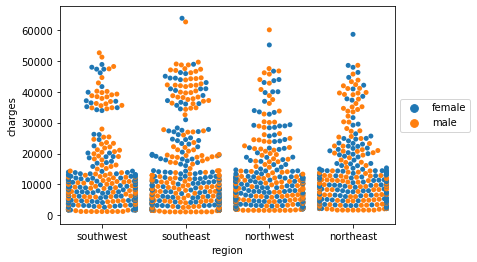

In [7]:
reg = sns.swarmplot(x='region', y='charges',hue='sex',data=insure)
reg.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

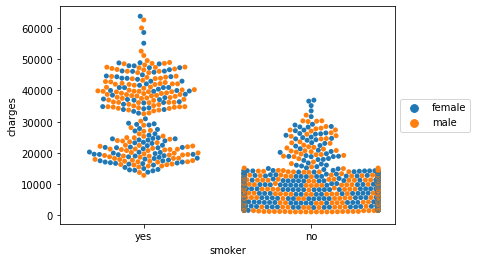

In [8]:
smo = sns.swarmplot(x='smoker', y='charges',hue='sex',data=insure)
smo.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

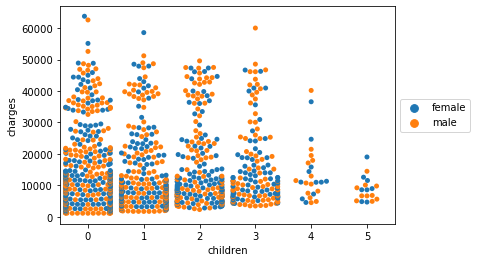

In [9]:
child = sns.swarmplot(x='children', y='charges',hue='sex',data=insure)
child.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

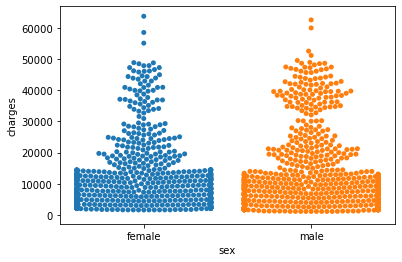

In [10]:
gender = sns.swarmplot(x='sex', y='charges',data=insure)

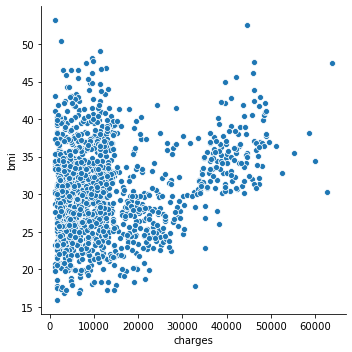

In [11]:
sns.relplot(x='charges',y='bmi',data=insure,sizes=(40, 400))

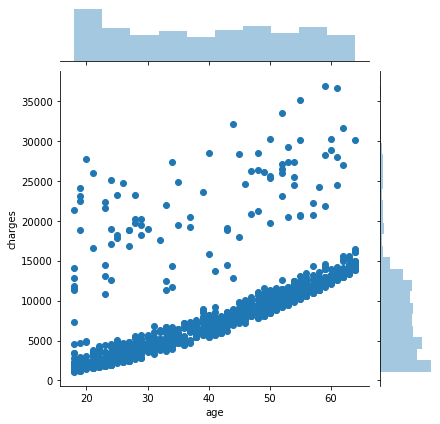

In [12]:
sns.jointplot(x='age',y='charges',data = insure[(insure.smoker=='no')])

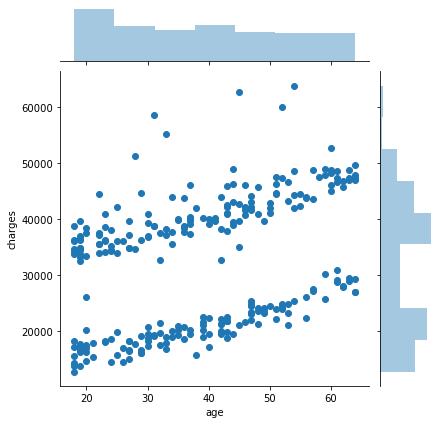

In [13]:
sns.jointplot(x='age',y='charges',data = insure[(insure.smoker=='yes')])

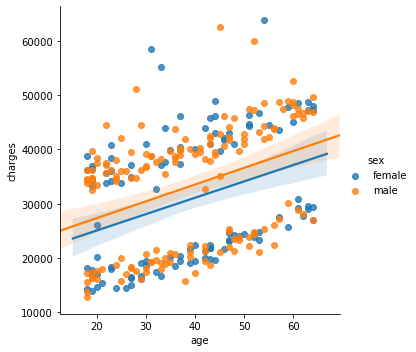

In [14]:
sns.lmplot(x="age", y="charges", hue="sex",
               height=5, data = insure[(insure.smoker=='yes')])

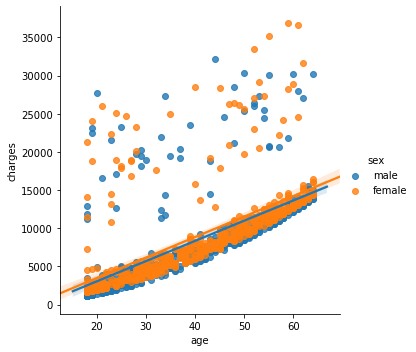

In [15]:
sns.lmplot(x="age", y="charges", hue="sex",
               height=5, data = insure[(insure.smoker=='no')])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(insure.sex.drop_duplicates()) 
insure.sex = le.transform(insure.sex)

le.fit(insure.smoker.drop_duplicates()) 
insure.smoker = le.transform(insure.smoker)

In [27]:
x = insure.drop(['charges','region'], axis = 1)
y = insure.charges

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)
lr = LinearRegression()
lr.fit(x_train,y_train)

# y_train_pred = lr.predict(x_train)
# y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7894790349867009


In [28]:
predictions = lr.predict(x_test)

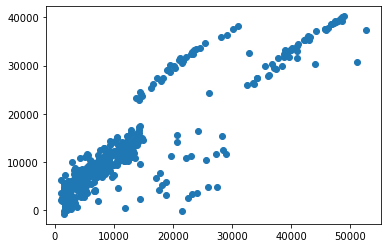

In [29]:
plt.scatter(y_test,predictions)